Подключаем необходимые библиотеки

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
%matplotlib inline
import matplotlib.pylab as pylab

## Квадратичная функция

Реализация необходимых функций. Рассматривается функция вида $$f(x) = \frac{1}{2}x^{\mathsf{T}}Ax - b^{\mathsf{T}}x$$

In [53]:
def f(x, A, b):  #Функция
    '''
    Целевая функция
    '''
    return 0.5 * x.dot(A.dot(x)) - np.dot(b, x)
def grad_f(x, A): #Ее градиент
    '''
    Градиент целевой функции
    '''
    return A.dot(x) - b

### Градиентный спуск

In [54]:
def grad_descent(f, grad_f, x_0, alpha = 0.001, num_iter = 1000, loss = 1e-6, return_gradient_norm = False):
    '''
    Реализация градиентного спуска с постоянным шагом. 
    return_gradient_norm = True - выводит вторые нормы всех градиентов посчитанных точек
    '''
    current_iter = 1
    x = x_0
    x_convergence = [x_0]
    grad_norm_convergence = [norm(grad_f(x_0))]
    while current_iter <= num_iter and norm(grad_f(x)) > loss:
        x = x - alpha * grad_f(x)
        x_convergence.append(x)
        if return_gradient_norm:
            grad_norm_convergence.append(norm(grad_f(x)))
    
    if return_gradient_norm:
        return x, x_convergence, norm(grad_f(x)), grad_norm_convergence
    else:
        return x, x_convergence, norm(grad_f(x))

Инициализируем данные для функции и начальную точку

In [55]:
A = np.array([
     [0.78, -0.02, -0.12, -0.14],
     [-0.02, 0.86, -0.04, 0.06],
     [-0.12, -0.04, 0.72, -0.08],
     [-0.14, 0.06, -0.08, 0.74]
])
b = np.array([0.76, 0.08, 1.12, 0.68])

arr_f = lambda x: f(x, A, b) #Теперь фукнция уже с заданной матрицей A и b
gr_f = lambda x: grad_f(x, A) #Градиент с заданной матрицей A

x0 = np.array([0,0,0,0], dtype = np.float64) #Начальная точка

Запускаем метод без вывода норм градиентов

In [56]:
x, x_convergence, current_norm_gradient = grad_descent(arr_f, gr_f, x0)

Смотрим на норму крайней точки

In [57]:
print(("Current gradient norm: %f")%(current_norm_gradient))

Current gradient norm: 0.000001


### Сходимость по норме градиента

Запускаем метод с выводом норм градиентов

In [58]:
x, x_convergence, current_norm_gradient, grad_norm_convergence = grad_descent(arr_f, gr_f, x0, return_gradient_norm=True)

Смотрим на количество точек

In [59]:
len(grad_norm_convergence)

27314

Оставим только часть точек, так как их довольно много.

In [60]:
plot_grad_norm_convergence = [grad_norm_convergence[i] for i in range(len(grad_norm_convergence)) if i % 100 == 0 ]
plot_x_convergence = [x_convergence[i]  for i in range(len(x_convergence)) if i % 100 == 0]

Далее идет ячейка для построения графика, показывающего результаты оптимизации

No handles with labels found to put in legend.


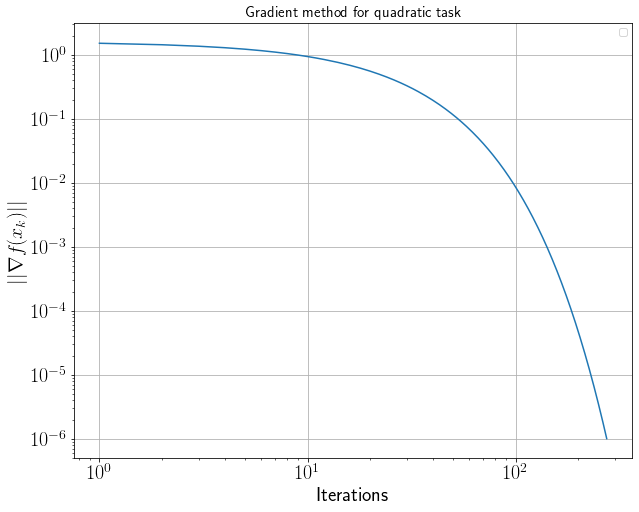

In [61]:

plt.figure(figsize=[10, 8])
plt.loglog(np.linspace(1,len(plot_grad_norm_convergence), len(plot_grad_norm_convergence)), plot_grad_norm_convergence)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.legend()
plt.title('Gradient method for quadratic task',fontsize=15)
plt.ylabel(r"$||\nabla f(x_k)||$", fontsize=20)
plt.xlabel(r"Iterations", fontsize=20)
plt.savefig('example_problem.png')